# Coupled Simple Land Simulations

##### Marysa M Laguë
##### 2017.02.21

## Spatial maps looking at how ALBEDO perturbations influence select surface variables


## Setup 
(This section just has code needed to manipulate the netcdf files, make plots, load data, etc)

### modules


In [1]:
# For interactive in-line plots:
#%matplotlib nbagg  

# For inline plots:
%matplotlib inline     

import matplotlib
import numpy as np
import os
import datetime
import netCDF4 as nc
import xarray as xr
from scipy import interpolate
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import brewer2mpl as cbrew
import scipy.io as sio

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

In [2]:
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

### Functions

##### Plotting

In [3]:

def mml_fig(LN,LT,mapdata,ds,myvar,proj,title=None,clim=None,colmap=None,units=None):
    #x_data, y_data, x_label, y_label, title=None, xlim=None, ylim=None
    ''' Desctiption of function goes here. Also, single and double quotes are the same...'''

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    mp = Basemap(projection='robin',lon_0=180.,lat_0 = 0) # can't make it start anywhere other than 180???
    mp.drawcoastlines()
    mp.drawmapboundary(fill_color='1.')  # make map background white
    parallels = np.arange(-90.,90,20.)
    mp.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,linewidth=0.5,dashes=[1,2])
    meridians = np.arange(0.,360.,20.)
    mp.drawmeridians(meridians,linewidth=0.5,dashes=[1,2])
    #(x, y) = m(LONXY, LATXY)
    cs = mp.pcolormesh(LN,LT,mapdata,cmap=plt.cm.inferno,latlon=True)
    
    if cm:
        cs.cmap = colmap
    else:
        cs.cmap = plt.cm.inferno    
    
    cbar = mp.colorbar(cs,location='bottom',pad="5%")
    cbar.set_label('units: '+ds[myvar].units)
    
    if title:
        plt.title(title,fontsize=12)
    else:
        plt.title(ds[myvar].long_name,fontsize=12)
    
    if clim:
        cbar.set_clim(clim[0],clim[1])
        cs.set_clim(clim[0],clim[1])
    
    
    
    
    #plt.suptitle('units?')
    #plt.show()
    
    
    #plt.show()
    return fig, mp, ax, cbar, cs

def mml_map(LN,LT,mapdata,ds,myvar,proj,title=None,clim=None,colmap=None,cb_ttl=None):
    # need to have already opened a figure/axis
    #plt.sca(ax)
    
    mp = Basemap(projection='robin',lon_0=180.,lat_0 = 0) # can't make it start anywhere other than 180???
    mp.drawcoastlines()
    mp.drawmapboundary(fill_color='1.')  # make map background white
    parallels = np.arange(-90.,90,20.)
    mp.drawparallels(parallels,labels=[1,0,0,0],fontsize=10,linewidth=0.5,dashes=[1,2])
    meridians = np.arange(0.,360.,20.)
    mp.drawmeridians(meridians,linewidth=0.5,dashes=[1,2])
    #(x, y) = m(LONXY, LATXY)
    cs = mp.pcolormesh(LN,LT,mapdata,cmap=plt.cm.inferno,latlon=True)
    
    if cm:
        cs.cmap = colmap
    else:
        cs.cmap = plt.cm.inferno    
    
    cbar = mp.colorbar(cs,location='bottom',pad="5%")
    
    if cb_ttl:
        cbar.set_label(cb_ttl,fontsize=12)
    else:
        cbar.set_label('units: '+ds[myvar].units,fontsize=12)
    
    if title:
        plt.title(title,fontsize=12)
    else:
        plt.title(ds[myvar].long_name,fontsize=12)
    
    if clim:
        cbar.set_clim(clim[0],clim[1])
        cs.set_clim(clim[0],clim[1])
    
    
    
    
    #plt.suptitle('units?')
    #plt.show()
    
    
    #plt.show()
    return mp, cbar, cs


def sl_clm_fig(myvar,myds,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff):

    ###  Make a 3x3 subplot
    fig, axes = plt.subplots(3, 3, figsize=(20,12))

    # hide the plots below the diagonal
    axes[1, 0].axis('off')
    axes[2, 0].axis('off')
    axes[2, 1].axis('off')

    # CLM 4.5:
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    mapdata_nan = mapdata_1
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = ttl_1

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata1,myds,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    #cbar0.title('units = unitless')

    # SL_clm: 
    ax1 = axes.flatten()[1]
    plt.sca(ax1)
    mapdata_nan = mapdata_2
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = ttl_2

    mp2, cbar2, cs2 = mml_map(LN,LT,mapdata2,myds,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    # SL_ceres:
    ax2 = axes.flatten()[2]
    plt.sca(ax2)
    mapdata_nan = mapdata_3
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = ttl_3
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata3,myds,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )


    # SL_clm - clm5:
    ax4 = axes.flatten()[4]
    plt.sca(ax4)
    mapdata_nan = mapdata_sl - mapdata_clm
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata12 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = 'Simple Land (clm '+r'$\alpha$'+') - CLM5.0'
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata12,myds,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )

    # SL_cer - clm5:
    ax5 = axes.flatten()[5]
    plt.sca(ax5)
    mapdata_nan = mapdata_3 - mapdata_1
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata13 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = 'Simple Land (ceres '+r'$\alpha$'+') - CLM5.0'
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata13,myds,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )


    # SL_cer - SL_clm:
    ax8 = axes.flatten()[8]
    plt.sca(ax8)
    mapdata_nan = mapdata_3 - mapdata_2
    #create masked array where nan=mask. pcolormesh does not like NaNs.
    mapdata23 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)
    ttl = 'Simple Land ceres '+r'$\alpha$'+' - clm '+r'$\alpha$'
    mp3, cbar3, cs3 = mml_map(LN,LT,mapdata23,myds,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )



    # Figure title
    fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=18)

    return fig,axes

def pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT):
    # Make a 3x3 plot showing how high and low perturbations effect some field
    
    # Inputs:
    # myvar: string corresponding to the variable in question
    # ds1, ds2, ds3 : the handles for the 3 data sets of interest
    # mapdata_1, mapdata_2, mapdata_3 : the mapdata for each simulation - not using ds directly incase its a field we have to calculate
    # ttl_1, ttl_2, ttl_3 : names of each simulation, e.g. "simulation 1" 
    # ttl_main : the title explaining what we're plotting
    
    
    fig, axes = plt.subplots(3, 3, figsize=(20,18))
    
    # ds1:
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    ttl = ttl_1

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata_1,ds1,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # blank: 
    #ax1 = axes.flatten()[1]
    #plt.sca(ax1)
    axes[0, 1].axis('off')

    # blank:
    #ax2 = axes.flatten()[2]
    #plt.sca(ax2)
    axes[0, 2].axis('off')
    
    # ds2:
    ax3 = axes.flatten()[3]
    plt.sca(ax3)
    ttl = ttl_2

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata_2,ds1,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # ds1 - ds2:
    ax4 = axes.flatten()[4]
    plt.sca(ax4)
    ttl = ttl_1 + ' - ' + ttl_2
    mapdata = mapdata_1 - mapdata_2

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # blank
    #ax5 = axes.flatten()[5]
    #plt.sca(ax5)
    axes[1, 2].axis('off')
    
    # ds3:
    ax6 = axes.flatten()[6]
    plt.sca(ax6)
    ttl = ttl_3

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata_3,ds1,myvar,'moll',title=ttl,clim=clim_abs,colmap=cmap_abs, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # ds1 - ds3:
    ax7 = axes.flatten()[7]
    plt.sca(ax7)
    ttl = ttl_1 + ' - ' + ttl_3
    mapdata = mapdata_1 - mapdata_3

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r
    
    # ds2 - ds3:
    ax8 = axes.flatten()[8]
    plt.sca(ax8)
    ttl = ttl_2 + ' - ' + ttl_3
    mapdata = mapdata_2 - mapdata_3

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=18)

    return fig,axes

def pert4_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT):
    # Make a 3x4 plot showing the response of a single variable across the 4 different perturbation experiments, plotting
    #
    # alpha1 - base    |    alpha2 - base   |     alpha1 - alpha2
    # h1 - base        |    h2 - base       |     h1 - h2
    # cv1 - base       |    cv2 - base      |     cv1 - cv2
    # rs1 - base       |    rs2 - base      |     rs1 - rs2
    #
    #
    
    # Inputs:
    # myvar: string corresponding to the variable in question
    # ds0, mapdata_0, ttl_0 = info for the base case (no perturbations)
    # ds1a, ds1b, etc : the handles for the 4 data sets of interest, where a is the lower perturbation and b is the higher perturbation
    # mapdata_1, mapdata_2, mapdata_3 : the mapdata for each simulation - not using ds directly incase its a field we have to calculate
    # ttl_1, ttl_2, ttl_3 : names of each simulation, e.g. "simulation 1" 
    # ttl_main : the title explaining what we're plotting
    
    
    fig, axes = plt.subplots(3, 4, figsize=(20,24))
    
    #------------------------------------------
    # ALBEDO 
    
    # alpha1 - base :
    ax0 = axes.flatten()[0]
    plt.sca(ax0)
    ttl = 'Low albedo (alpha=.1) - base (alpha=.2)'
    mapdata = mapdata_1a - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # alpha2 - base :
    ax1 = axes.flatten()[1]
    plt.sca(ax1)
    ttl = 'High albedo (alpha=.3) - base (alpha=.2)'
    mapdata = mapdata_1b - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    # alpha1 - alpha2 :
    ax2 = axes.flatten()[2]
    plt.sca(ax2)
    ttl = 'Low albedo (alpha=.1) - high albedo (alpha=.3)'
    mapdata = mapdata_1a - mapdata_1b

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    #------------------------------------------
    # ROUGHNESS HEIGHT
    
    # hc1 - base :
    ax3 = axes.flatten()[3]
    plt.sca(ax3)
    ttl = 'Low roughness (h=.5 m) - base (h=1 m)'
    mapdata = mapdata_2a - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # hc2 - base :
    ax4 = axes.flatten()[4]
    plt.sca(ax4)
    ttl = 'Low roughness (h=10 m) - base (h=1 m)'
    mapdata = mapdata_2b - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    # hc1 - hc2 :
    ax5 = axes.flatten()[5]
    plt.sca(ax5)
    ttl = 'Low roughness (h=.5 m) - high roughness (h=10 m)'
    mapdata = mapdata_2a - mapdata_2b

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    #------------------------------------------
    # Evaporative Resistance
    
    # rs1 - base :
    ax6 = axes.flatten()[6]
    plt.sca(ax6)
    ttl = 'Low evap resistance (res=30 s/m) - base (res=100 s/m))'
    mapdata = mapdata_3a - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # rs2 - base :
    ax7 = axes.flatten()[7]
    plt.sca(ax7)
    ttl = 'High evap resistance (res=200 s/m)) - base (res=100 s/m))'
    mapdata = mapdata_3b - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    # rs1 - s2
    ax8 = axes.flatten()[8]
    plt.sca(ax8)
    ttl = 'Low evap res (res=30 s/m)) - high evap res (res=200 s/m))'
    mapdata = mapdata_3a - mapdata_3b

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    #------------------------------------------
    # SOIL HEAT CAPACITY
    
    # cv1 - base :
    ax9 = axes.flatten()[9]
    plt.sca(ax9)
    ttl = 'Low soil heat capacity (cv=1.5e6 J/m3/K) - base (cv=2e6 J/m3/K)'
    mapdata = mapdata_4a - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    # cv2 - base :
    ax10 = axes.flatten()[10]
    plt.sca(ax10)
    ttl = 'High soil heat capacity (cv=3e6 J/m3/K) - base (cv=2e6 J/m3/K)'
    mapdata = mapdata_4b - mapdata_0

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r


    # cv2 - cv2 :
    ax11 = axes.flatten()[11]
    plt.sca(ax11)
    ttl = 'Low (cv=1.5e6 J/m3/K) - high (cv=3e6 J/m3/K) soil heat capacity'
    mapdata = mapdata_4a - mapdata_4b

    mp0, cbar0, cs0 = mml_map(LN,LT,mapdata,ds1,myvar,'moll',title=ttl,clim=clim_diff,colmap=cmap_diff, cb_ttl='units: '+units )   #plt.cm.BuPu_r

    #------------------------------------------
    
    fig.subplots_adjust(top=0.95)
    fig.suptitle(ttl_main, 
                 fontsize=18)

    return fig,axes

***

## Load the data 
(Point to the location of the files then open with xarray)

In [4]:
# Path to save figures:
figpath = '/home/disk/eos3/mlague/simple_land/scripts/python/analysis/global_pert/figures/'

# Point at the data sets
ext_dir = '/home/disk/eos3/mlague/cesmruns/SimpleLand/global_pert/'

# Coupled simulations:
sims = ['global_a2_cv2_hc1_rs100',
       'global_a1_cv2_hc1_rs100','global_a3_cv2_hc1_rs100',
       'global_a2_cv1.5_hc1_rs100','global_a2_cv3_hc1_rs100',
       'global_a2_cv2_hc0.5_rs100','global_a2_cv2_hc10_rs100',
       'global_a2_cv2_hc1_rs30','global_a2_cv2_hc1_rs200']

# load the file paths and # Open the coupled data sets in xarray
cam_files = {}
clm_files = {}
ds_cam = {}
ds_clm = {}

for run in sims:
    #print ( ext_dir + run + '/means/' + run + '.cam.h0.05-end_year_avg.nc' )
    cam_files[run] = ext_dir + run + '/means/' + run + '.cam.h0.05-end_year_avg.nc'
    clm_files[run] = ext_dir + run + '/means/' + run + '.clm2.h0.05-end_year_avg.nc'
    
    ds_cam[run] = xr.open_dataset(cam_files[run])
    ds_clm[run] = xr.open_dataset(clm_files[run])


# open a cam area file produced in matlab using an EarthEllipsoid from a cam5 f19 lat/lon data set
area_f19_mat = sio.loadmat('/home/disk/eos3/mlague/simple_land/scripts/python/analysis//f19_area.mat')
area_f19 = area_f19_mat['AreaGrid']


/home/disk/p/mlague/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:389: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/disk/p/mlague/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:408: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


### Load some standard variables
lat, lon, landmask

In [5]:
ds = ds_clm['global_a2_cv2_hc1_rs100']
lat = ds['lat'].values
lon = ds['lon'].values
landmask = ds['landmask'].values

LN,LT = np.meshgrid(lon,lat)

#print(np.shape(LN))
#print(np.shape(landmask))


***
# Analysis
Make some plots of results, see how the land models compare with the same atmospheric forcing!



# Coupled Simulations

# ALBEDO PERTURBATIONS

### Albedo

0.290532706351
0.707462029362
-0.224966906201
0.0737287379353


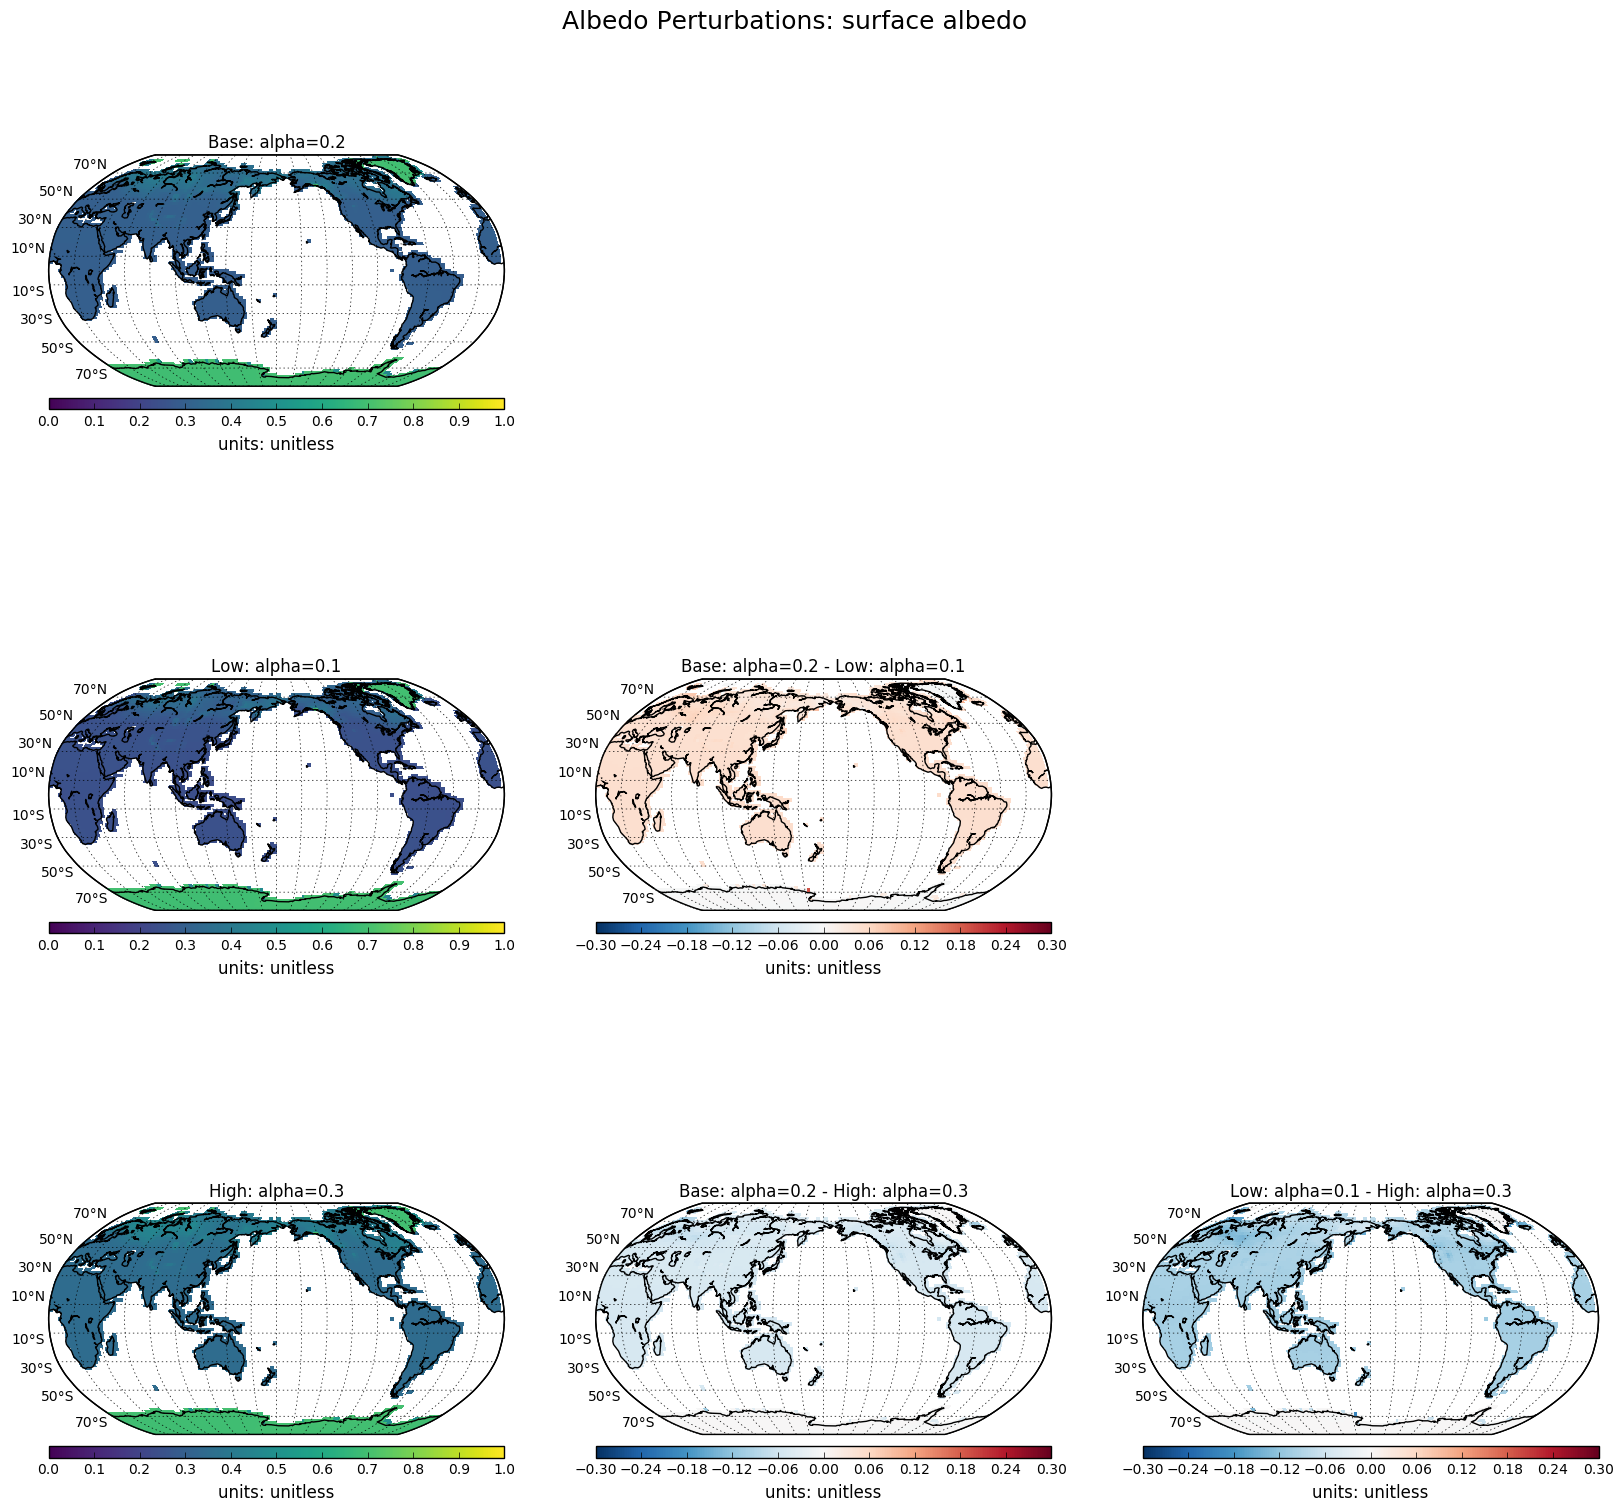

In [6]:
# Plots
myvar = 'MML_fsr'
ds1 = ds_clm['global_a2_cv2_hc1_rs100']
ds2 = ds_clm['global_a1_cv2_hc1_rs100']
ds3 = ds_clm['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')['MML_fsr'].values.squeeze() / ds1.mean('time')['MML_fsds'].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')['MML_fsr'].values.squeeze() / ds2.mean('time')['MML_fsds'].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')['MML_fsr'].values.squeeze() / ds3.mean('time')['MML_fsds'].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'unitless'

ttl_main = 'Albedo Perturbations: surface albedo '
filename = 'albedo'

clim_abs = [0,1]
clim_diff = [-0.3,0.3]
cmap_abs = plt.cm.viridis
print(cmap_abs)
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

## Temperature (from CAM)

### Surface (skin) temperature

222.812
304.937
-1.83786
9.88275


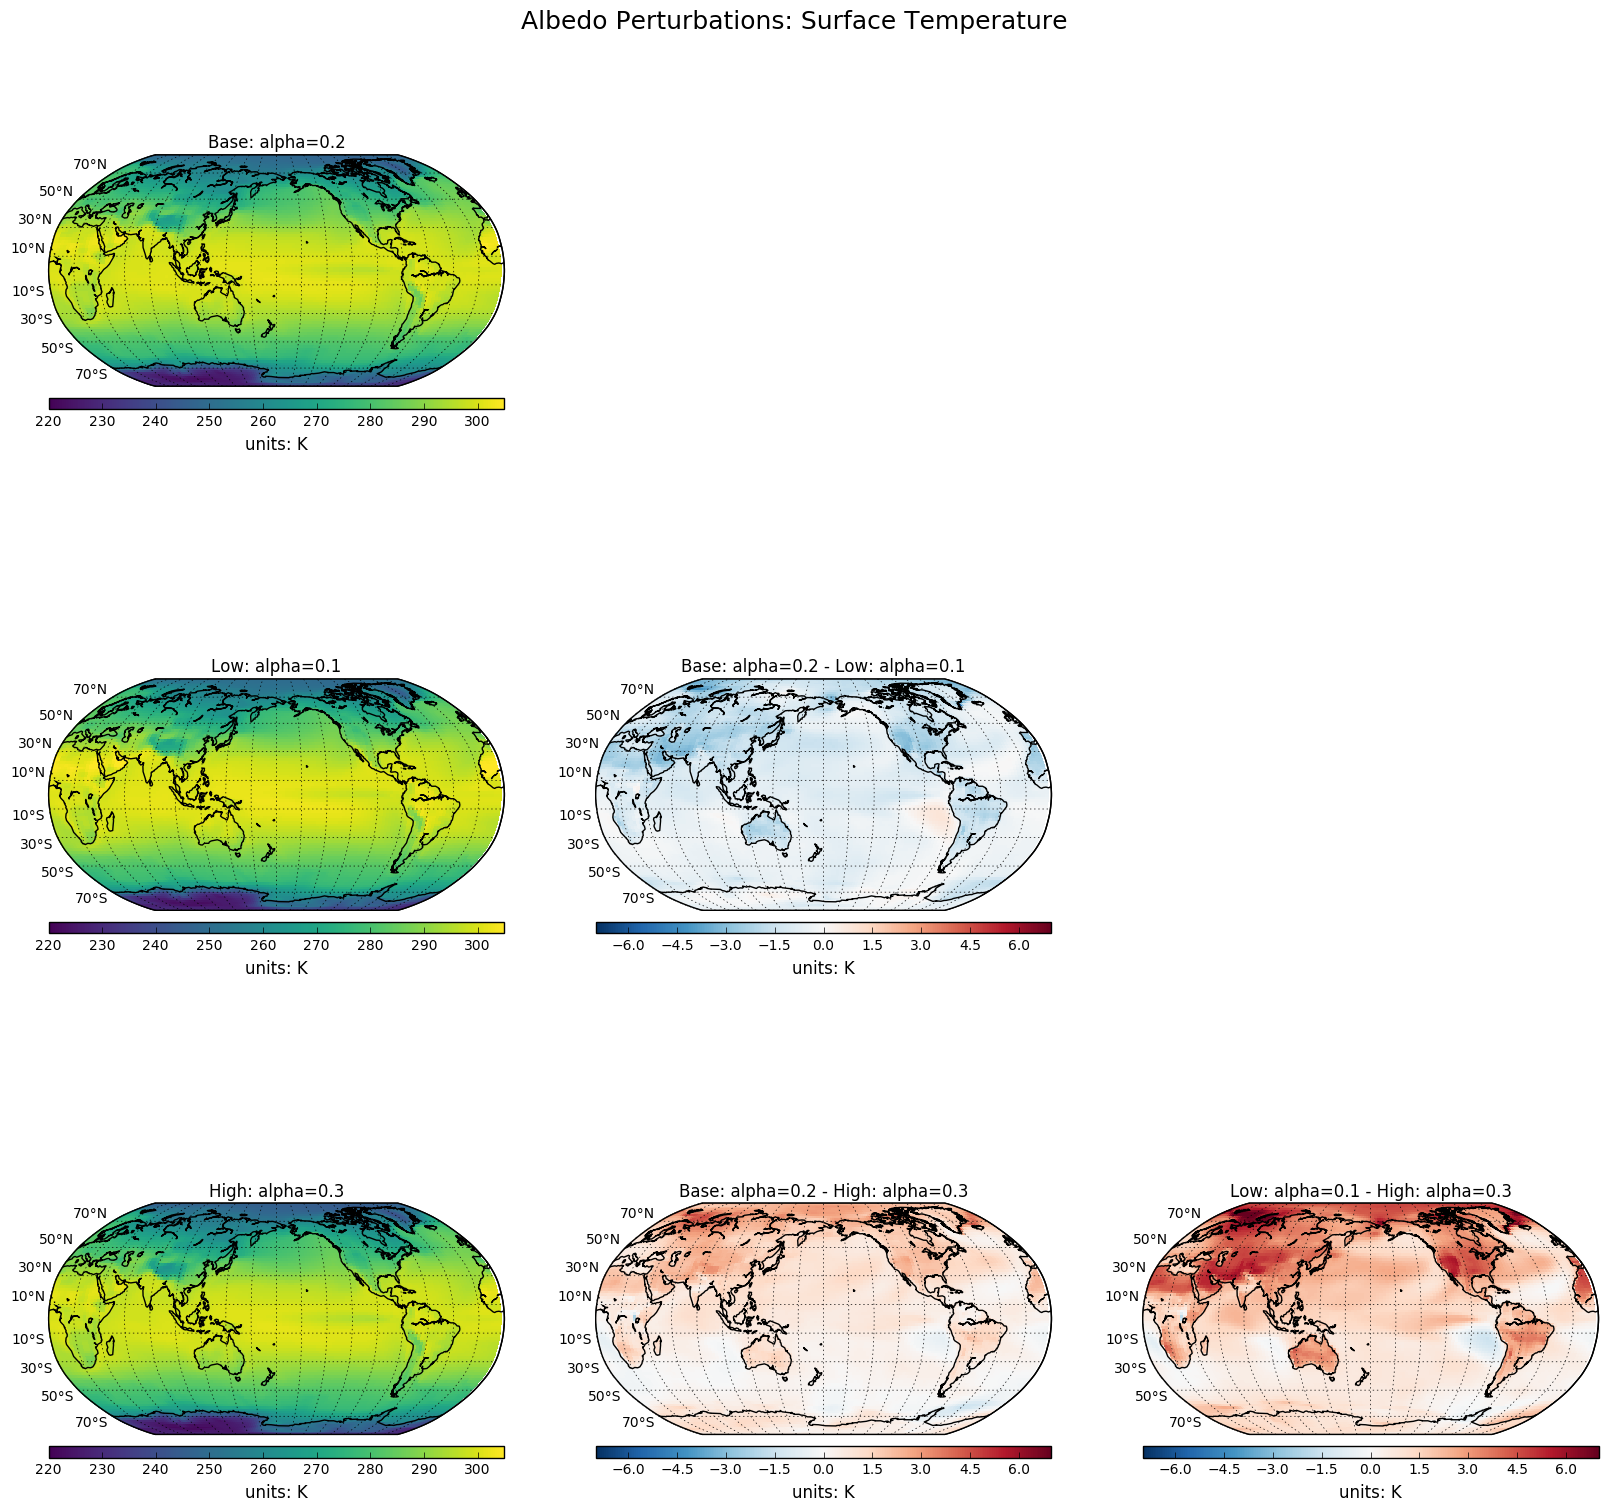

In [7]:
# Plots
myvar = 'TS'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'K'

ttl_main = 'Albedo Perturbations: Surface Temperature '
filename = myvar

clim_abs = [220,305]
clim_diff = [-7,7]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

224.336
303.483
-1.21402
7.20081


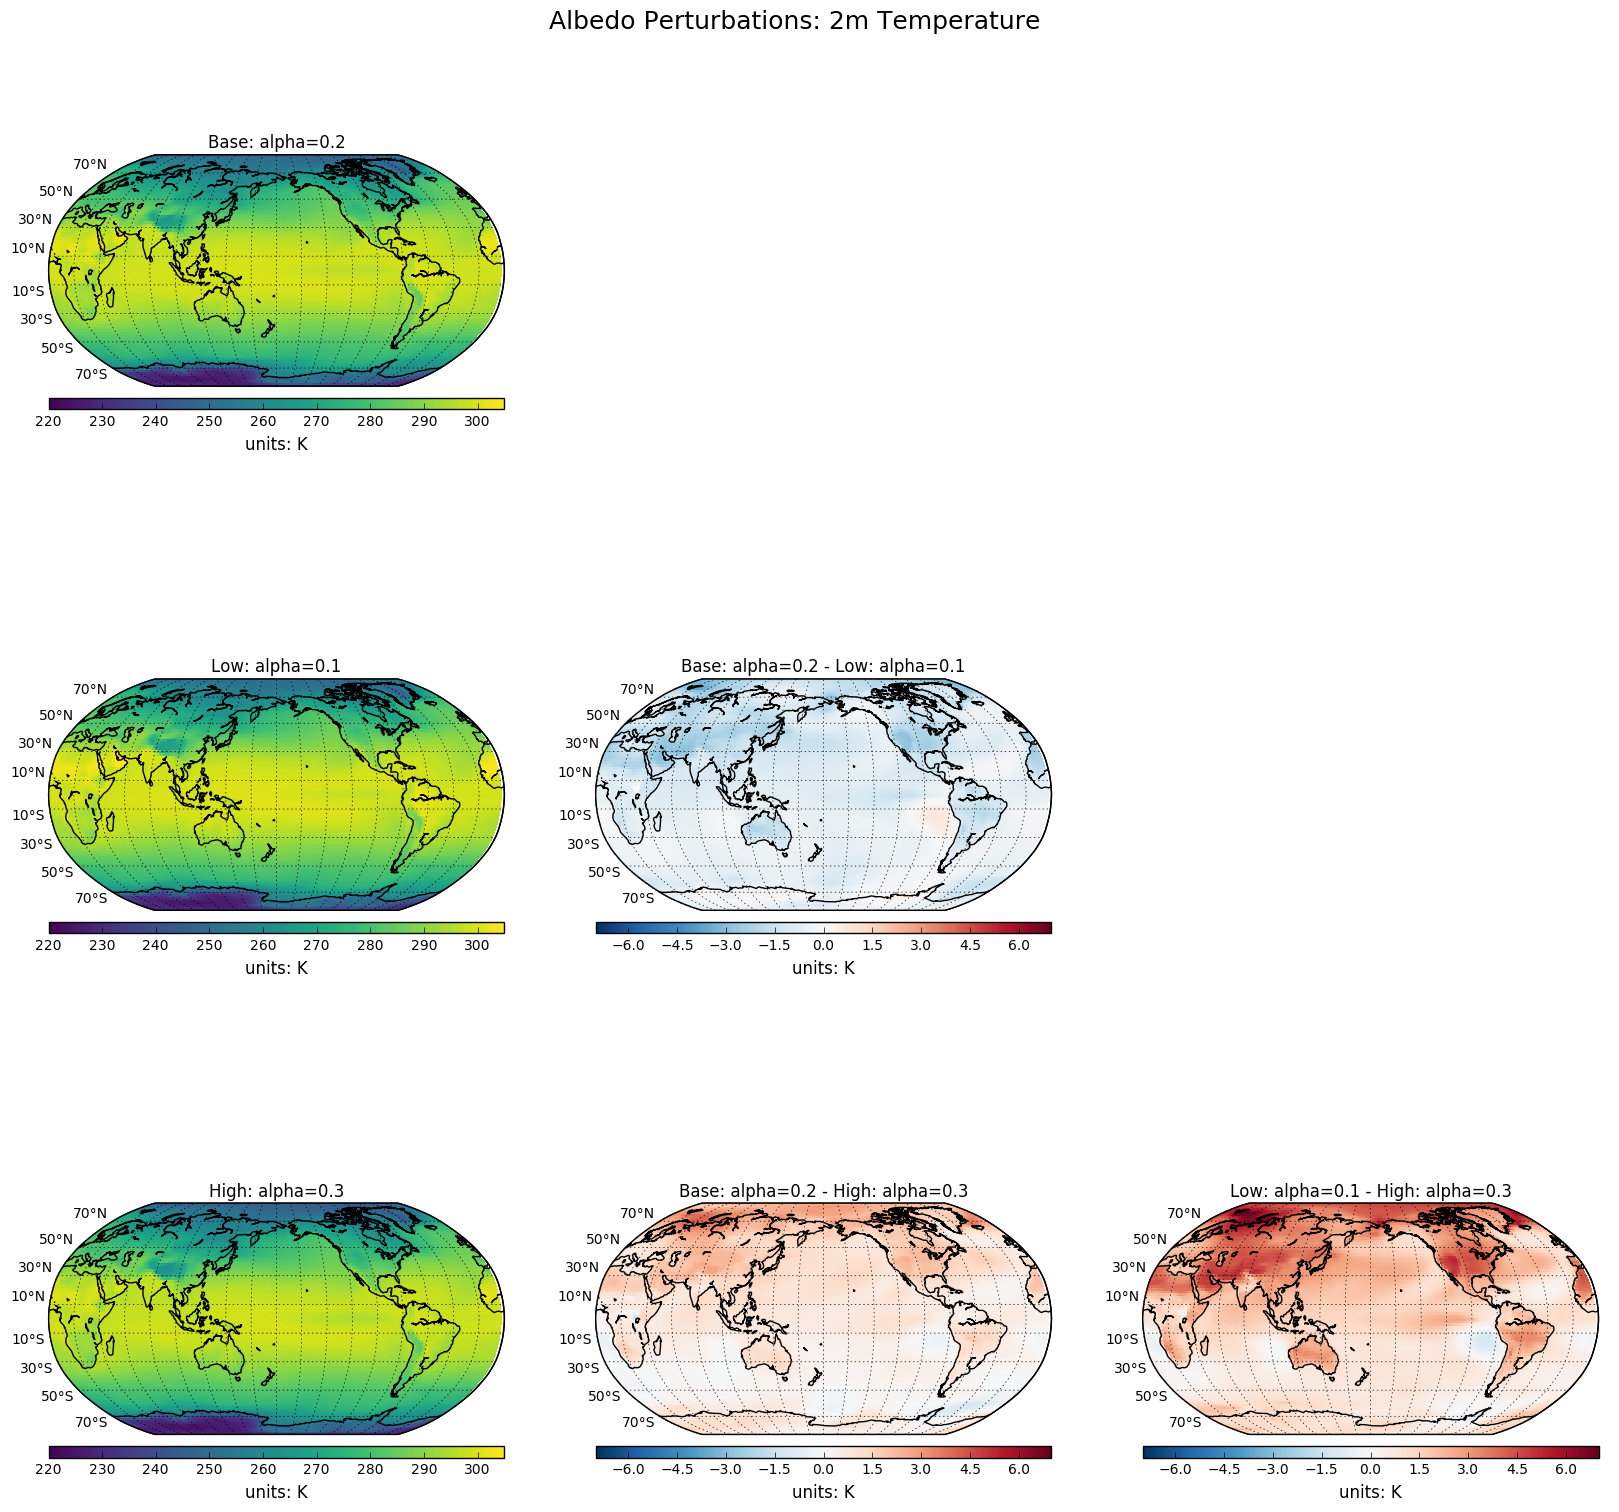

In [8]:
# Plots
myvar = 'TREFHT'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'K'

ttl_main = 'Albedo Perturbations: 2m Temperature '
filename = myvar

clim_abs = [220,305]
clim_diff = [-7,7]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

## Clouds

### Low Cloud

0.0
0.926005
-0.177383
0.232426


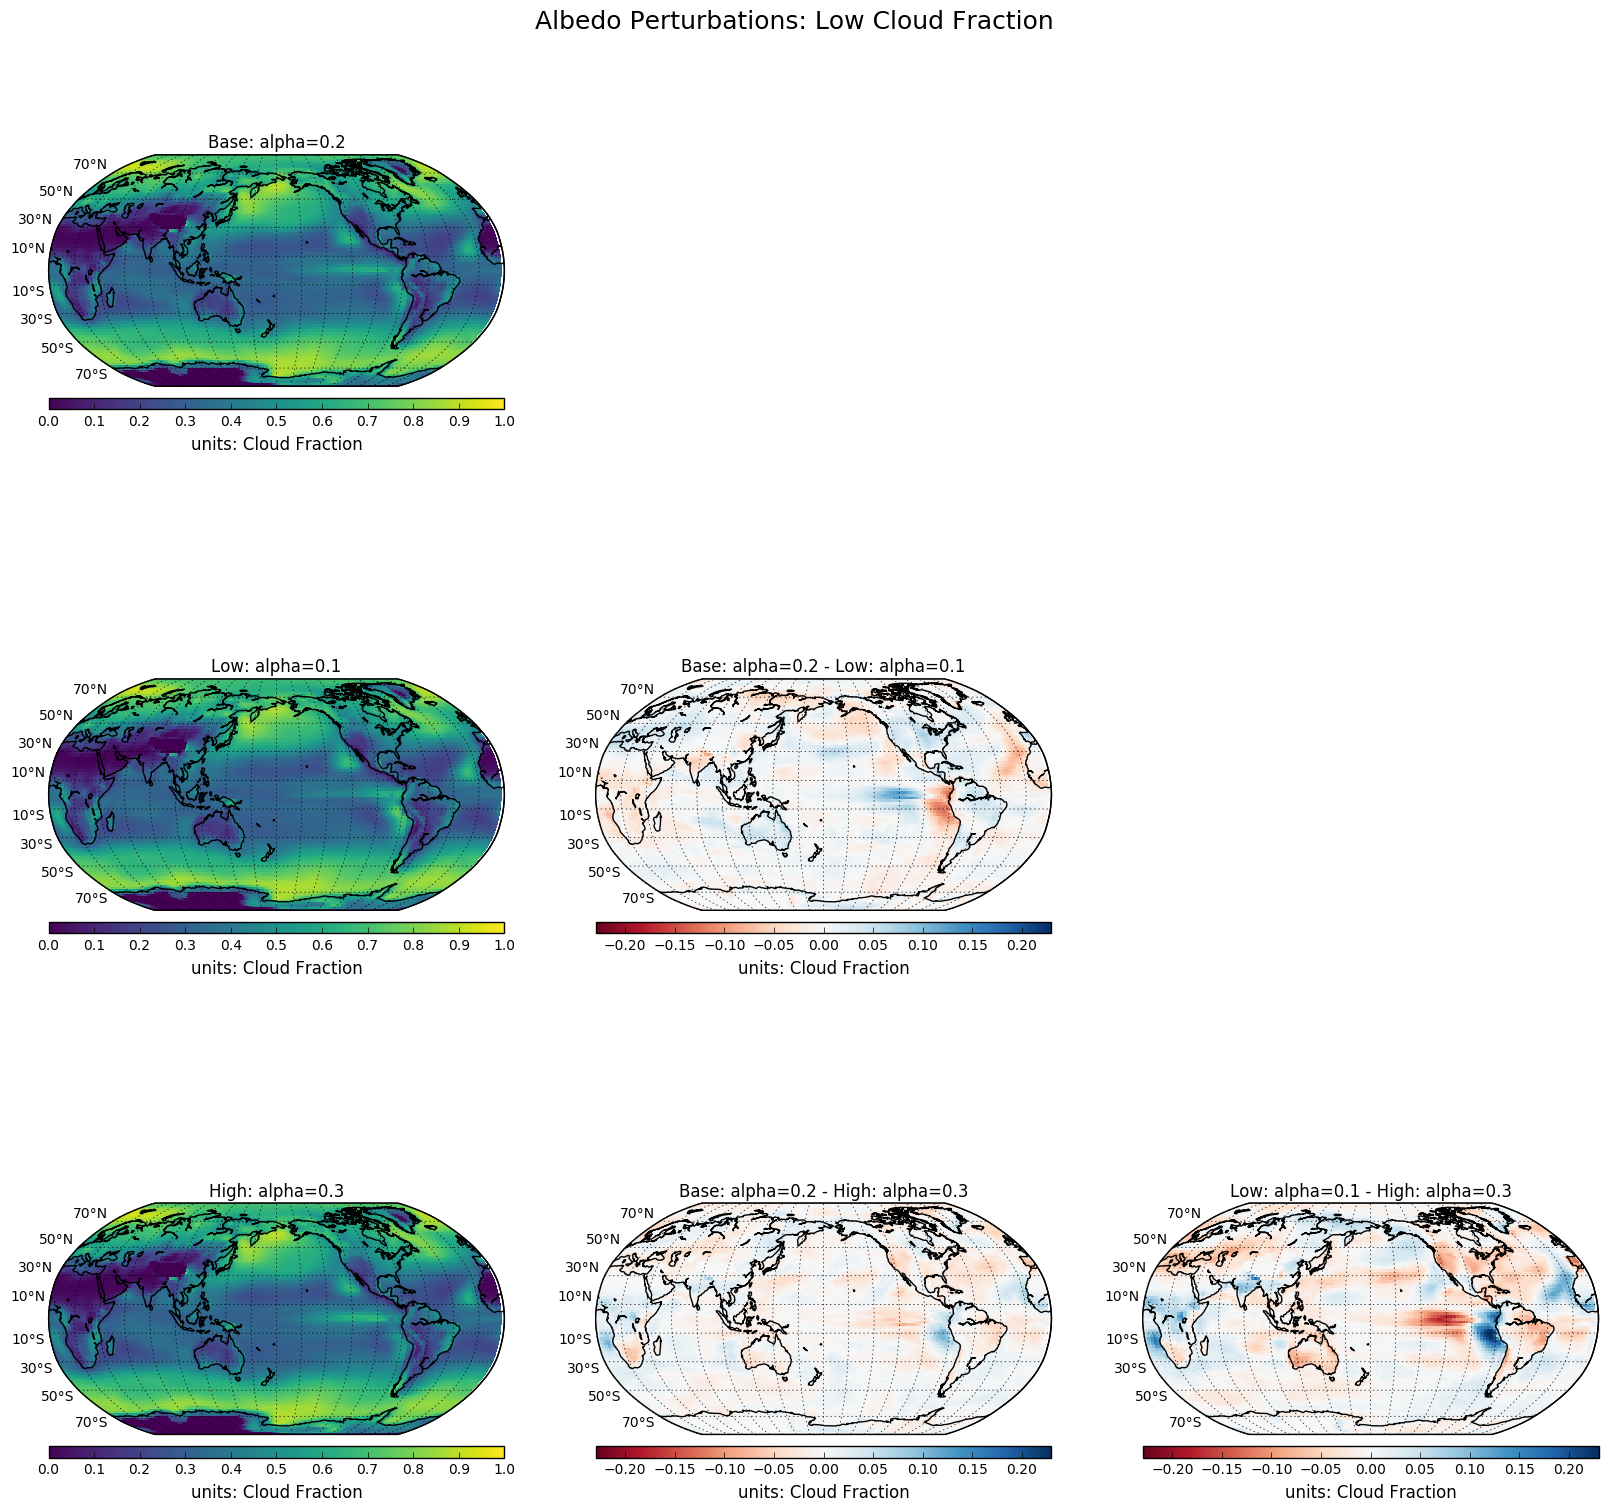

In [9]:
# Plots
myvar = 'CLDLOW'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'Cloud Fraction'

ttl_main = 'Albedo Perturbations: Low Cloud Fraction '
filename = myvar

clim_abs = [0,1]
clim_diff = [-.23,.23]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

### High cloud

0.11664
0.786298
-0.220614
0.224239


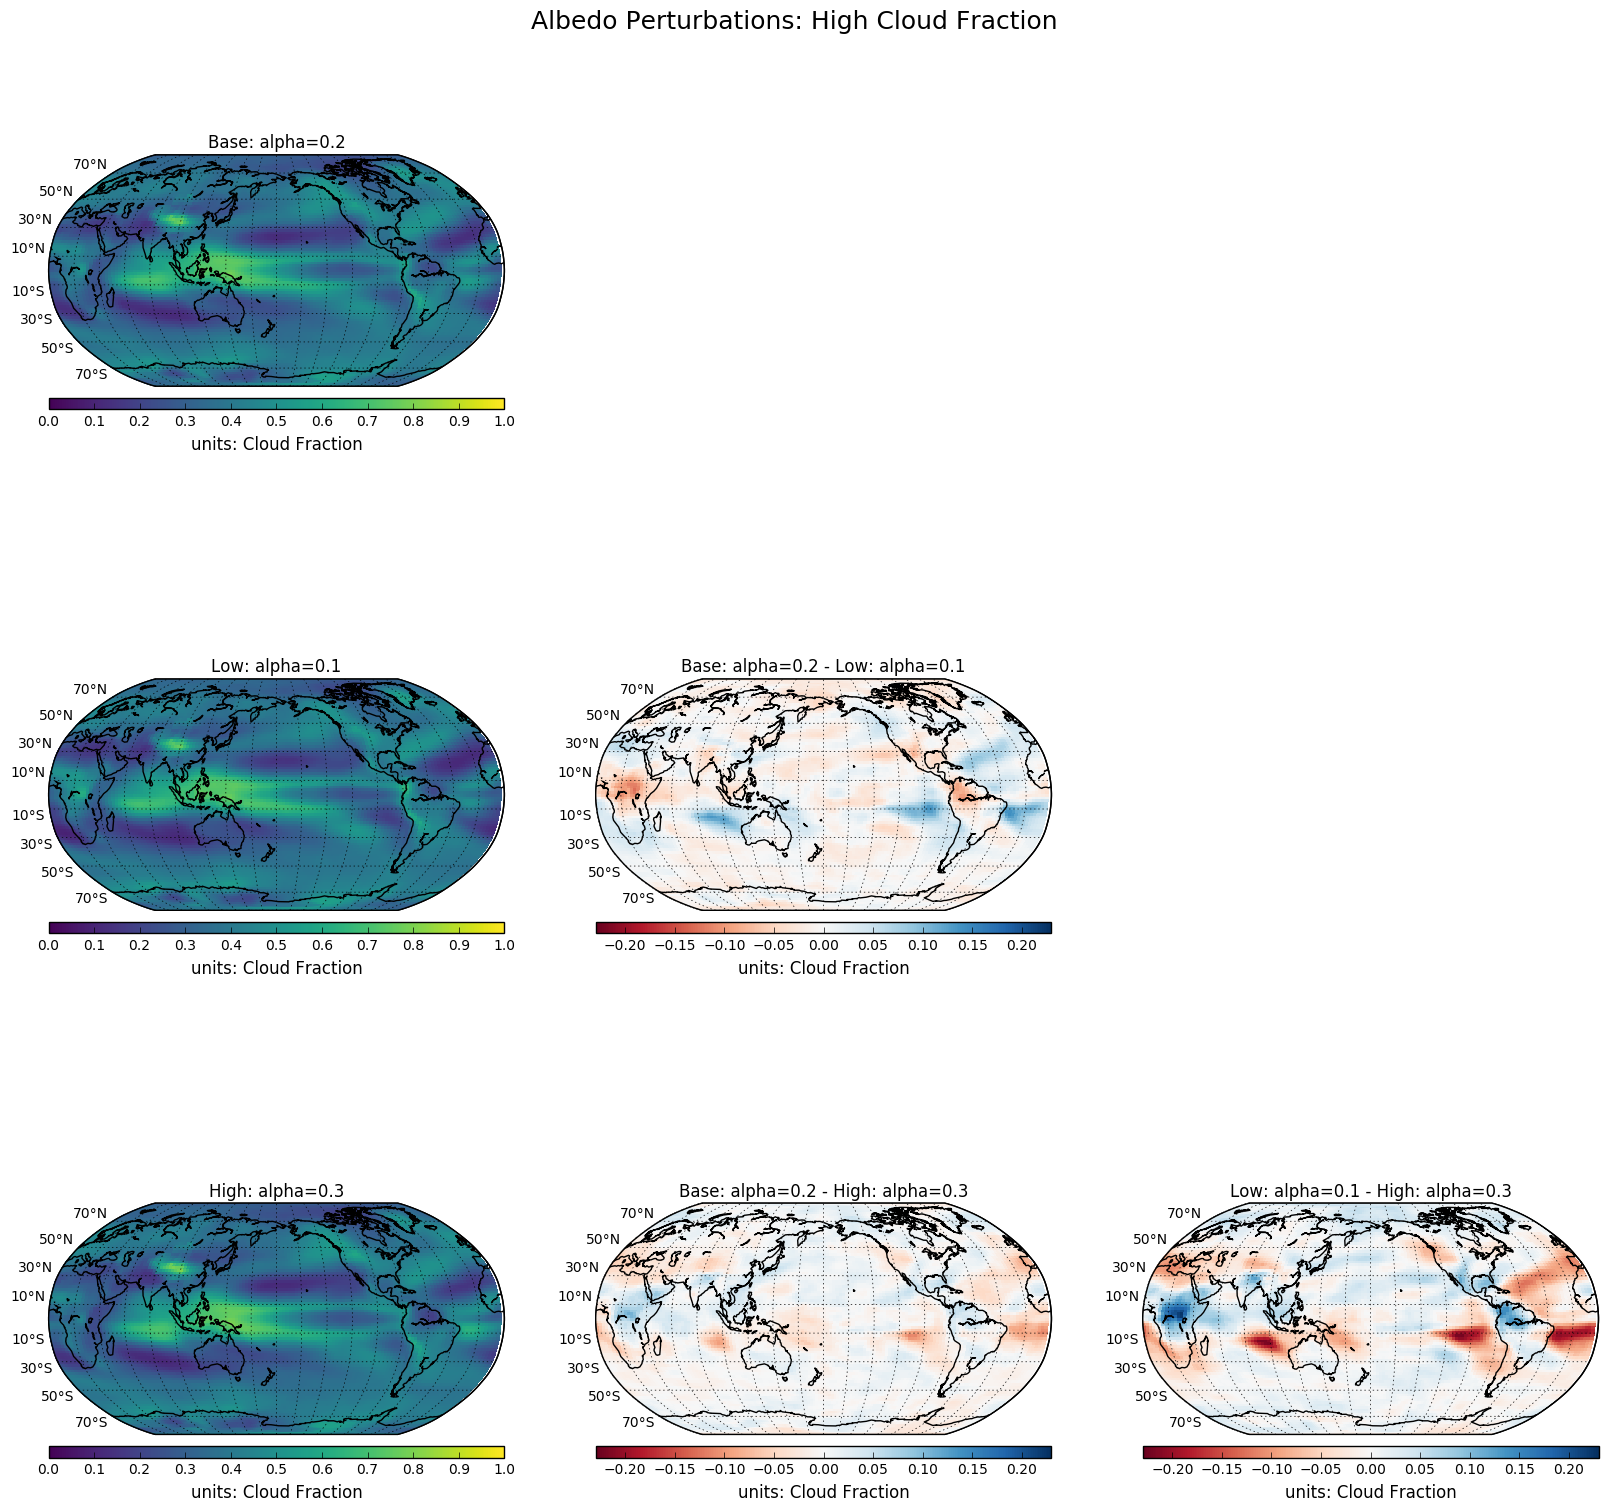

In [10]:
# Plots
myvar = 'CLDHGH'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'Cloud Fraction'

ttl_main = 'Albedo Perturbations: High Cloud Fraction '
filename = myvar

clim_abs = [0,1]
clim_diff = [-.23,.23]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

### Total cloud

0.156272
0.947049
-0.210778
0.198793


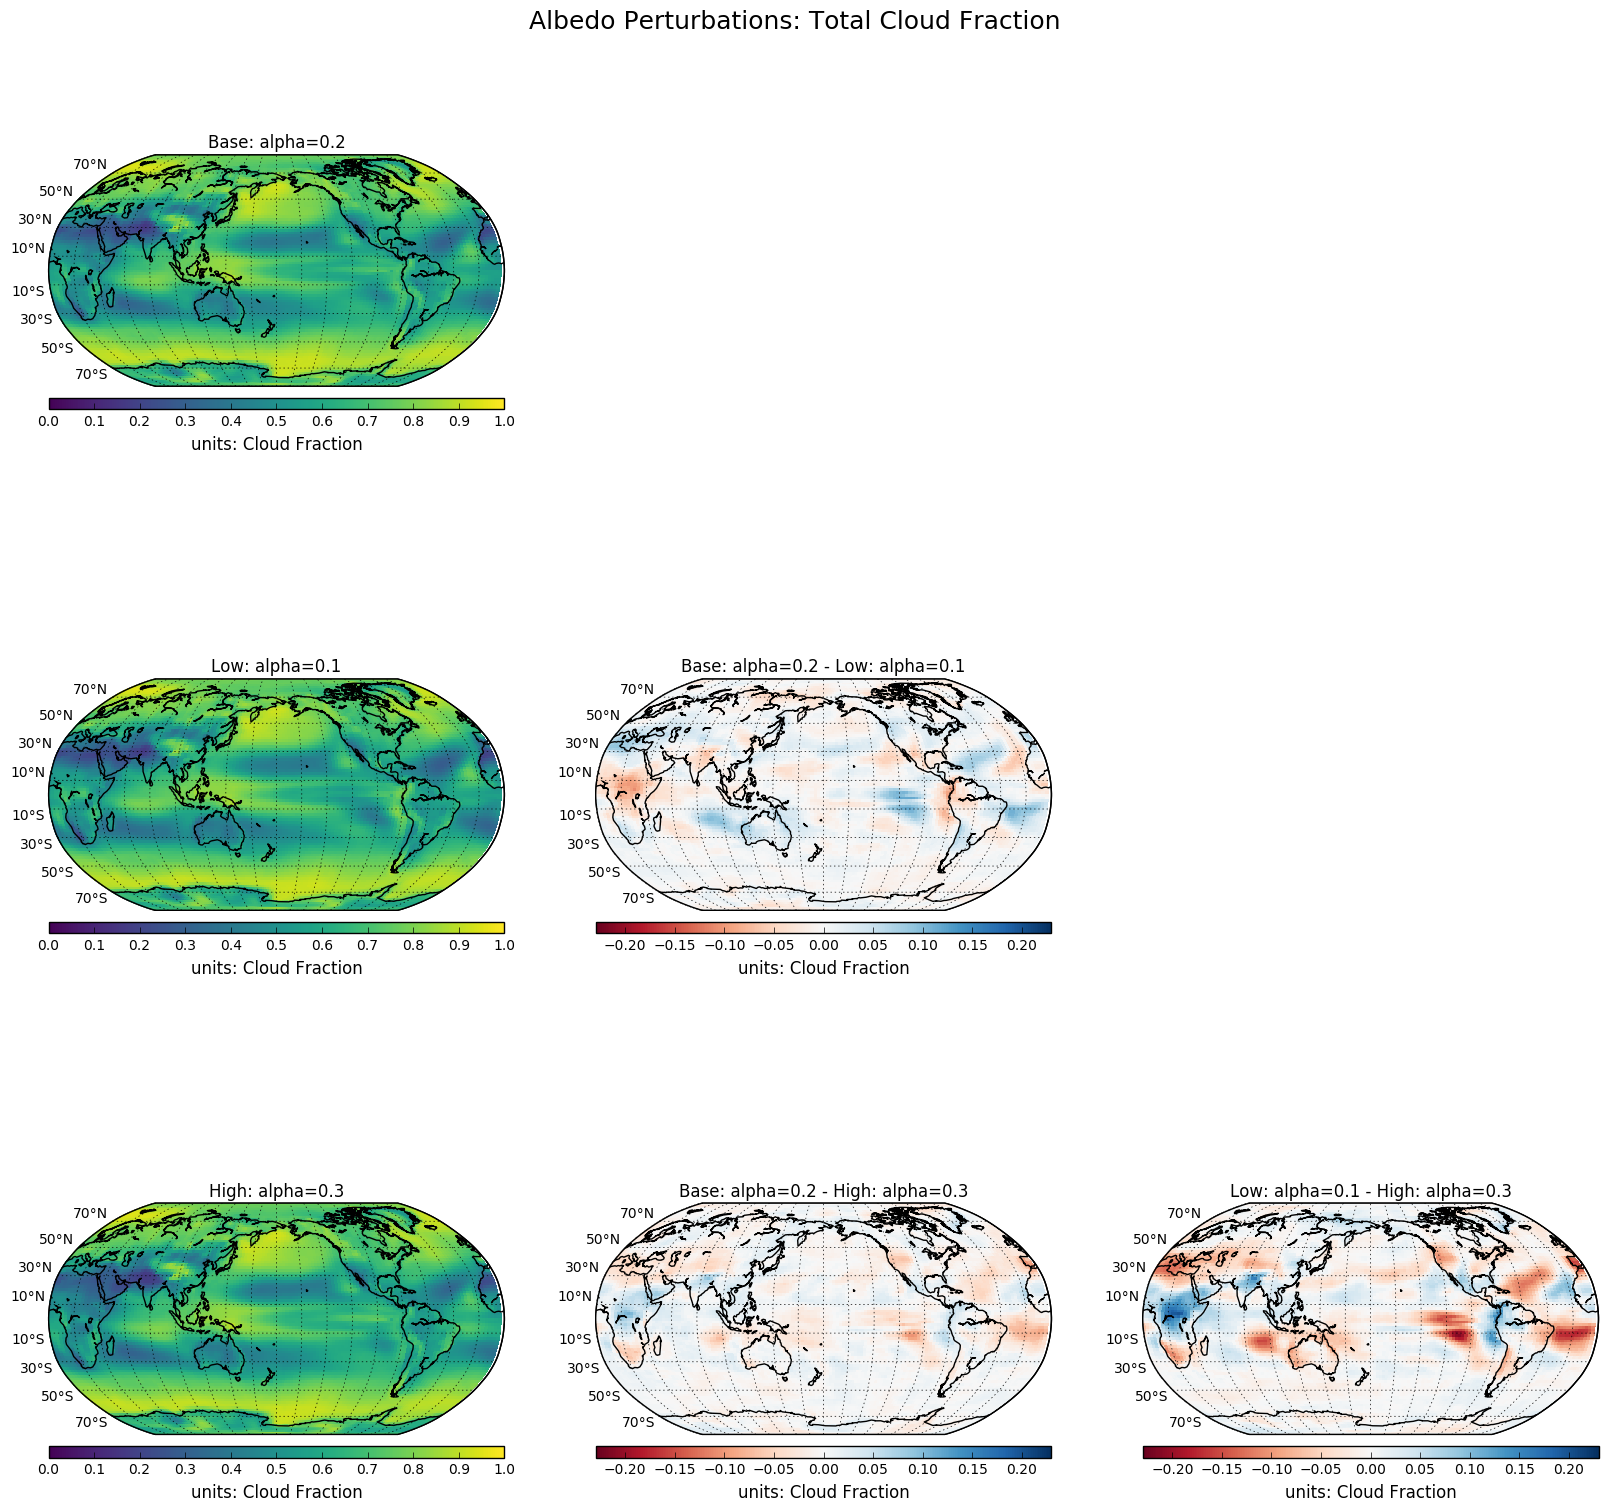

In [11]:
# Plots
myvar = 'CLDTOT'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'Cloud Fraction'

ttl_main = 'Albedo Perturbations: Total Cloud Fraction '
filename = myvar

clim_abs = [0,1]
clim_diff = [-.23,.23]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

In [12]:
# check what vars are available:
print(ds1.var)

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:        (ilev: 31, lat: 96, lev: 30, lon: 144, nbnd: 2, time: 12)
Coordinates:
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 -80.53 ...
  * lon            (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 ...
  * lev            (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * time           (time) object   10-08-02 12:00:00   10-08-30 12:00:00 ...
Dimensions without coordinates: nbnd
Data variables:
    gw             (lat) float64 0.0001367 0.001093 0.002185 0.003275 ...
    hyam           (lev) float64 0.003643 0.007595 0.01436 0.02461 0.03827 ...
    hybm           (lev) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    P0             float64 1e+05
    hyai           (ilev) float64 0.002255 0.005032 0.01016 0.01856 0.03067 ...
    hybi           (ilev

## Turbulent Fluxes

### Sensible Heat

-27.4553
125.245
-23.6082
44.3176


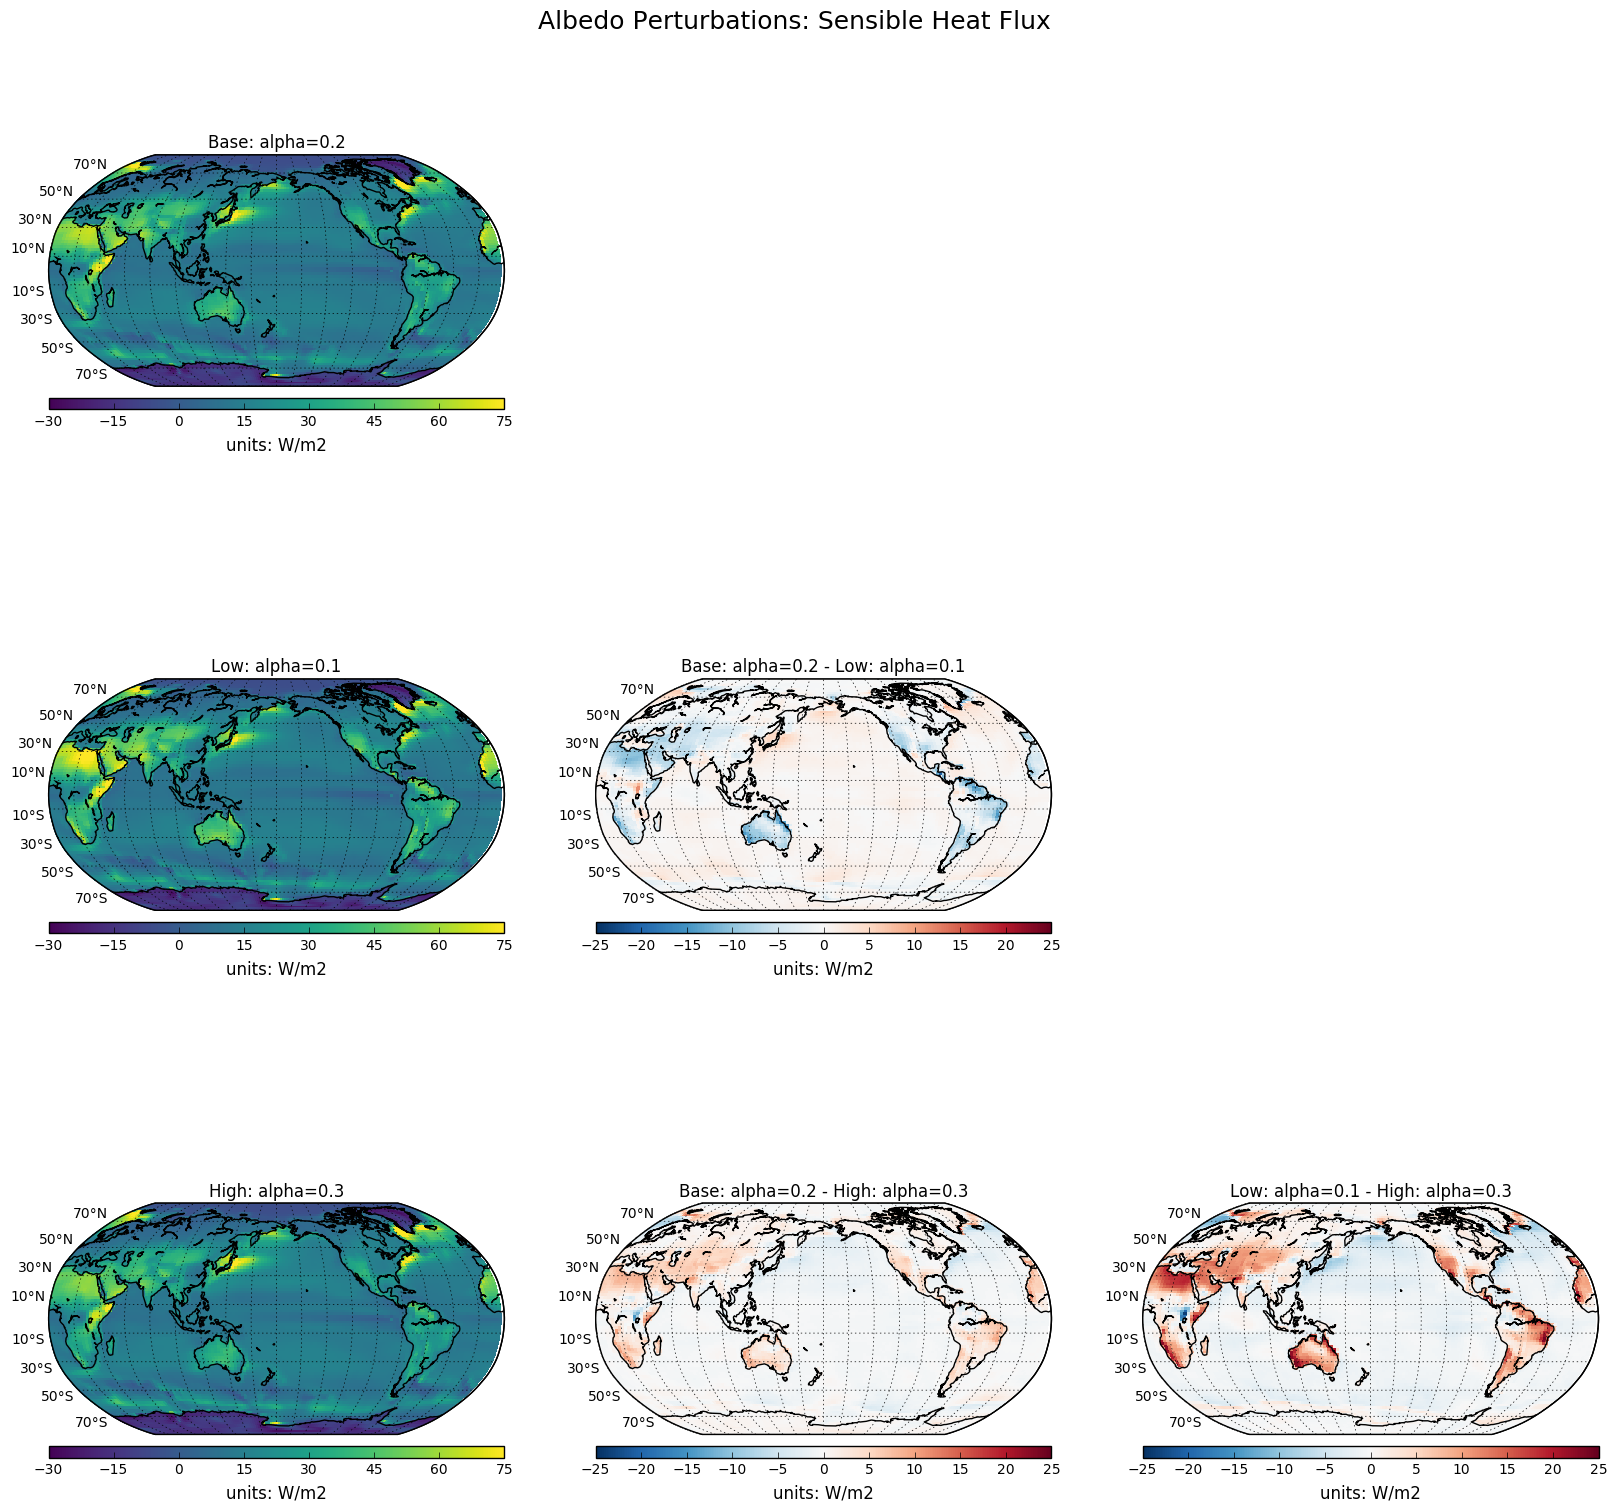

In [13]:
# Plots
myvar = 'SHFLX'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = ds1[myvar].units

ttl_main = 'Albedo Perturbations: Sensible Heat Flux '
filename = myvar

clim_abs = [-30,75]
clim_diff = [-25,25]
cmap_abs = plt.cm.viridis
print(cmap_abs)
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

### Latent Heat

0.266772
244.127
-19.773
57.028


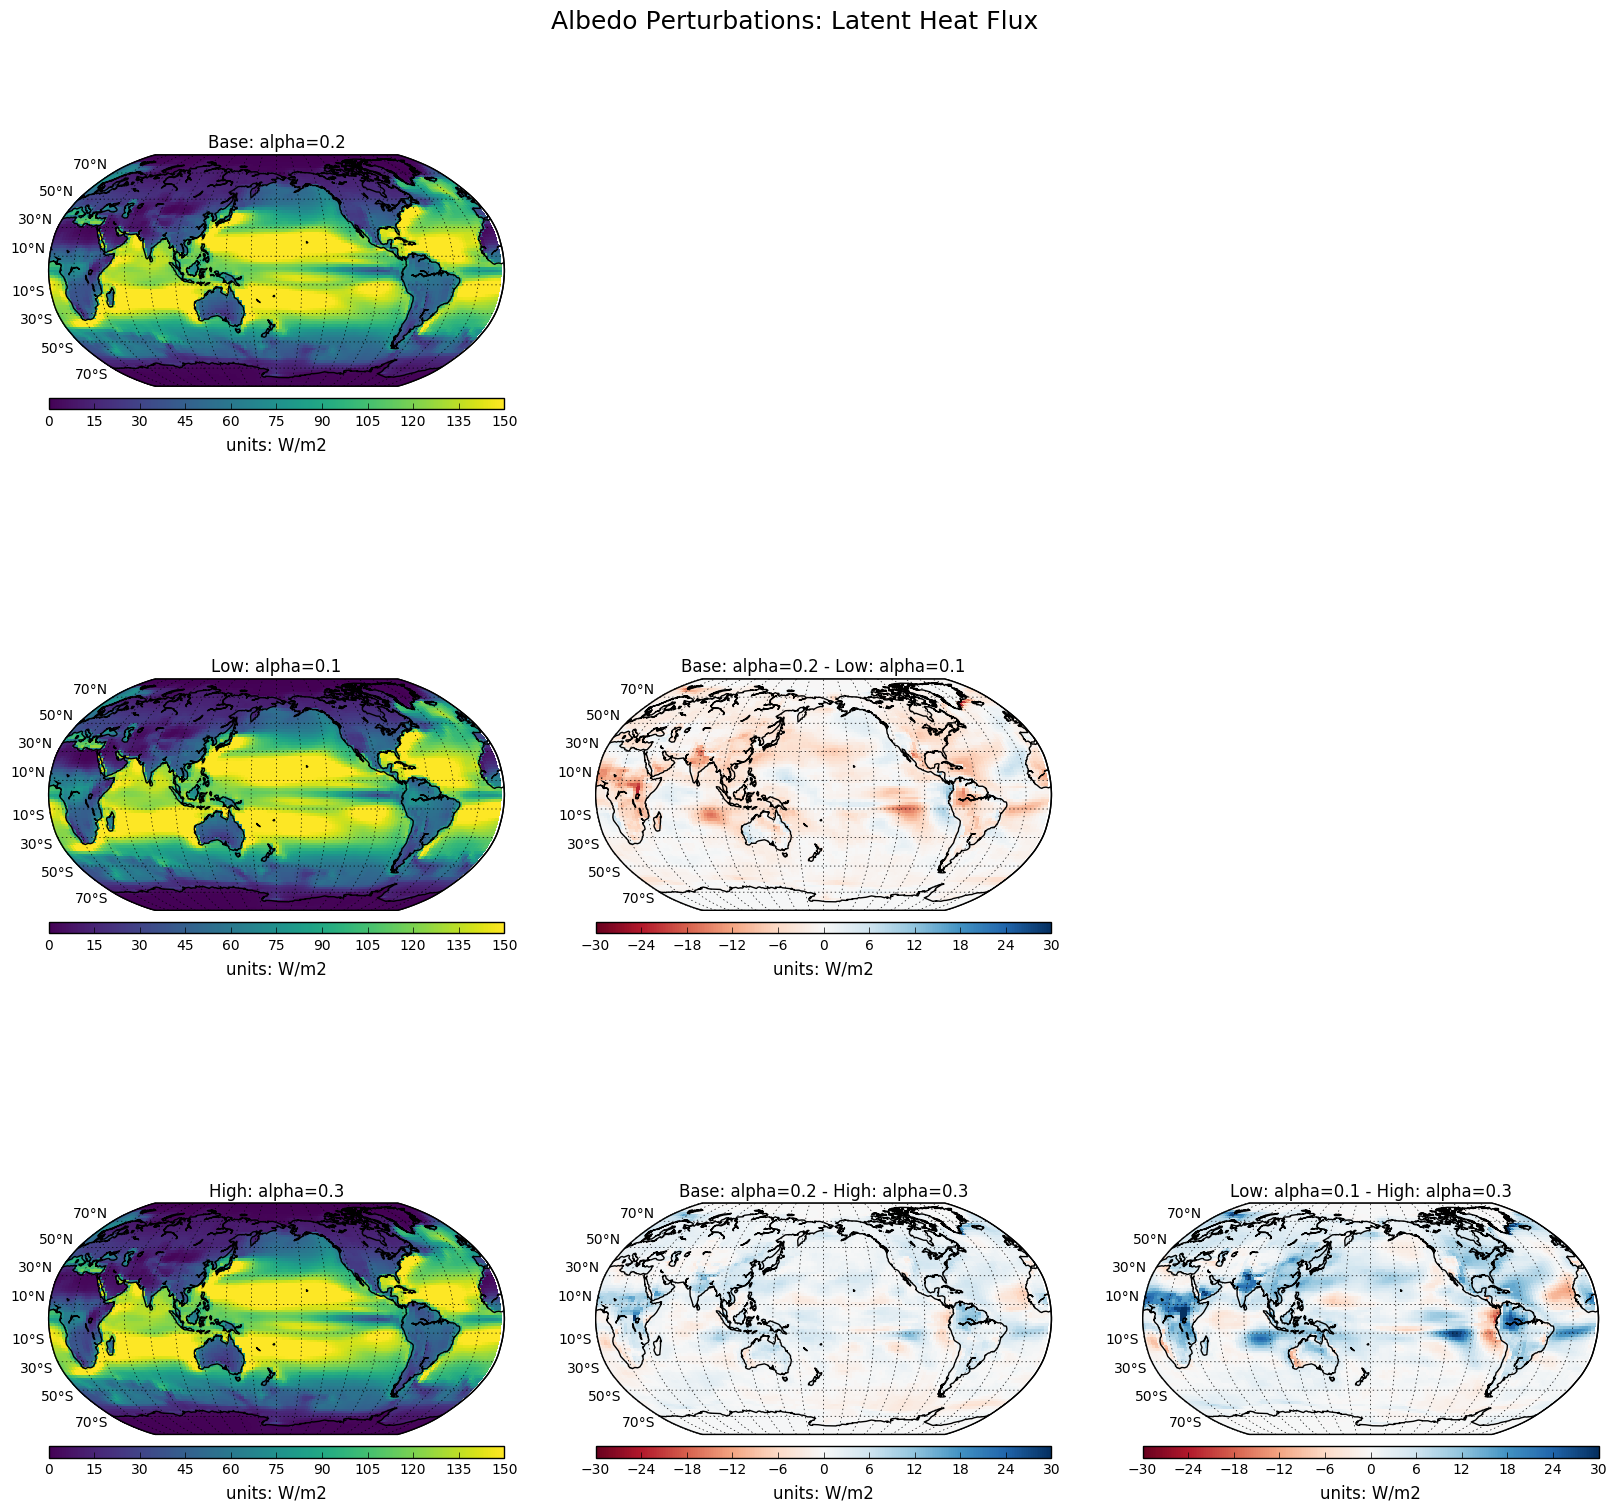

In [14]:
# Plots
myvar = 'LHFLX'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = ds1[myvar].units

ttl_main = 'Albedo Perturbations: Latent Heat Flux '
filename = myvar

clim_abs = [0,150]
clim_diff = [-30,30]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

### Sum of SHFLX + LHFLX

-24.0916
320.151
-20.818
101.346


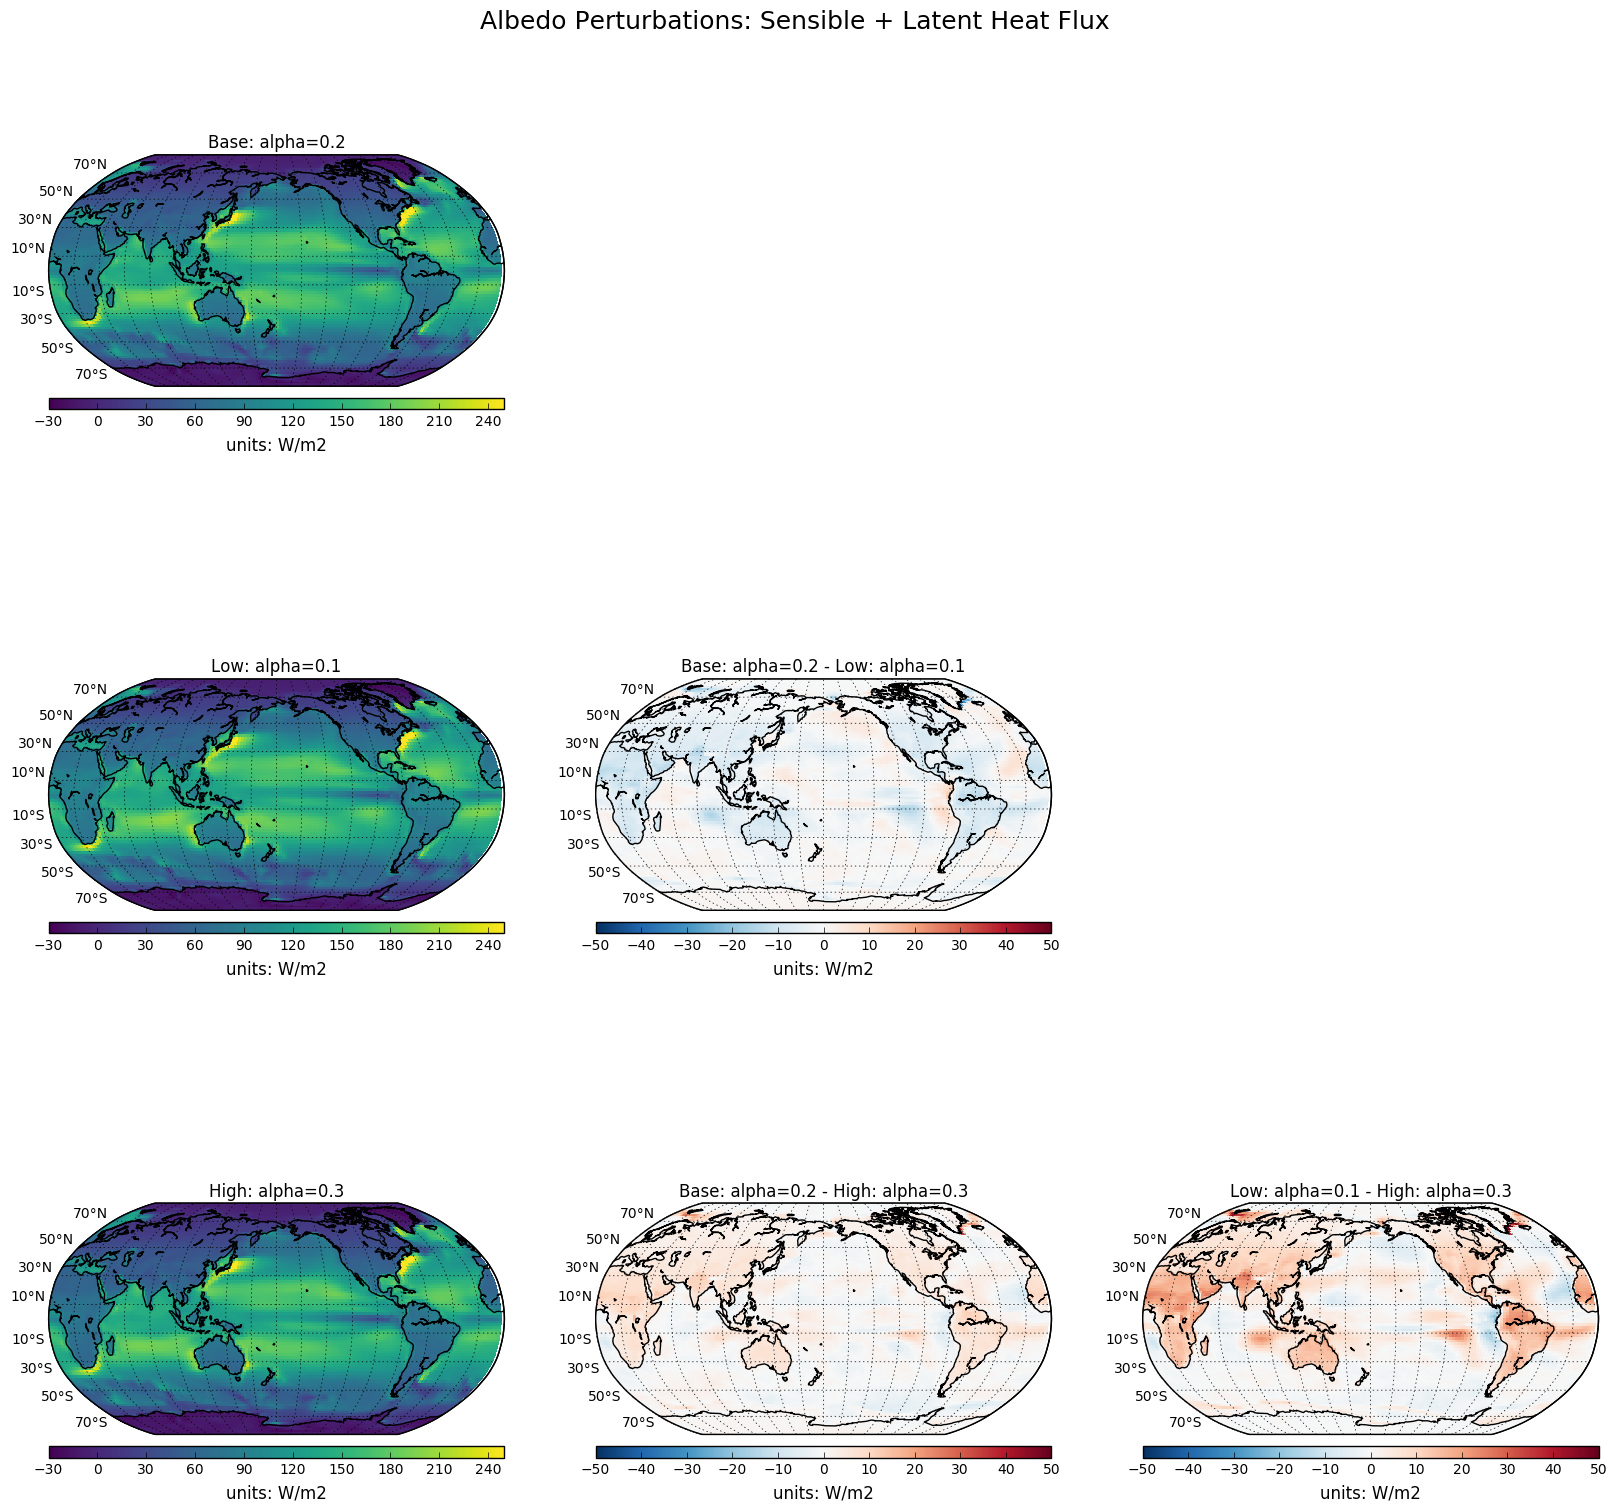

In [15]:
# Plots
myvar = 'LHFLX'
myvar2 = 'SHFLX'
ds1 = ds_cam['global_a2_cv2_hc1_rs100']
ds2 = ds_cam['global_a1_cv2_hc1_rs100']
ds3 = ds_cam['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze() + ds1.mean('time')[myvar2].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze() + ds2.mean('time')[myvar2].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze() + ds3.mean('time')[myvar2].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = ds1[myvar].units

ttl_main = 'Albedo Perturbations: Sensible + Latent Heat Flux '
filename = 'totTurbulent'

clim_abs = [-30,250]
clim_diff = [-50,50]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

# Plot all 4 pertubation sets for a given variable

In [16]:
# Define data sets and subtitles
ds0 = ds_cam['global_a2_cv2_hc1_rs100']

# albedo
ds1a = ds_cam['global_a1_cv2_hc1_rs100']
ds1b = ds_cam['global_a3_cv2_hc1_rs100']
# height
ds2a = ds_cam['global_a2_cv2_hc0.5_rs100']
ds2b = ds_cam['global_a2_cv2_hc10_rs100']
# evap res
ds3a = ds_cam['global_a2_cv2_hc1_rs30']
ds3b = ds_cam['global_a2_cv2_hc1_rs200']
# heat capacity
ds4a = ds_cam['global_a2_cv1.5_hc1_rs100']
ds4b = ds_cam['global_a2_cv3_hc1_rs100']

ttl_0 = 'a.2, cv2, hc1, rs100'
ttl_1a = 'a.1, cv2, hc1, rs100'
ttl_1a = 'a.2, cv2, hc1, rs100'
ttl_2a = 'a.2, cv2, hc0.5, rs100'
ttl_2a = 'a.2, cv2, hc10, rs100'
ttl_3a = 'a.2, cv2, hc1, rs30'
ttl_3a = 'a.2, cv2, hc1, rs200'
ttl_4a = 'a.2, cv1.5, hc1, rs100'
ttl_4a = 'a.2, cv3, hc1, rs100'


## Temperature
### T surface

In [17]:
# Plots
myvar = 'TS'

# -------------------------------
# Relevant details

units = ds1[myvar].units

ttl_main = '\Delta Surface Temperature'
filename = myvar

clim_abs = [220,320]
clim_diff = [-10,10]
cmap_abs = plt.cm.viridis
cmap_diff = plt.cm.RdBu

# -------------------------------
# Mapdata

# base
mapdata_nan = ds0.mean('time')[myvar].values.squeeze()
mapdata_0 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# albedos
mapdata_nan = ds1a.mean('time')[myvar].values.squeeze()
mapdata_1a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds1b.mean('time')[myvar].values.squeeze()
mapdata_1b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# roughness
mapdata_nan = ds2a.mean('time')[myvar].values.squeeze()
mapdata_2a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2b.mean('time')[myvar].values.squeeze()
mapdata_2b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# evaporative resistance
mapdata_nan = ds3a.mean('time')[myvar].values.squeeze()
mapdata_3a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3b.mean('time')[myvar].values.squeeze()
mapdata_3b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# soil heat capacity
mapdata_nan = ds4a.mean('time')[myvar].values.squeeze()
mapdata_4a = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds4b.mean('time')[myvar].values.squeeze()
mapdata_4b = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

# -------------------------------
# Make plot

fig, axes = pert4_fig(myvar,ds0,ds1a,ds1b,ds2a,ds2b,ds3a,ds3b,ds4a,ds4b, \
              mapdata_0,mapdata_1a,mapdata_1b,mapdata_2a,mapdata_2b,mapdata_3a,mapdata_3b,mapdata_4a,mapdata_4b, \
              ttl_0,ttl_1a,ttl_1b,ttl_2a,ttl_2b,ttl_3a,ttl_3b,ttl_4a,ttl_4b, \
              ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+'/3by4s/'+filename+'.pdf', bbox_inches='tight')


NameError: name 'ttl_1b' is not defined

### T 2m reference height

## Temperature (from CLM)

### Surface (skin) temperature

In [ ]:
# Plots
myvar = 'MML_ts'
ds1 = ds_clm['global_a2_cv2_hc1_rs100']
ds2 = ds_clm['global_a1_cv2_hc1_rs100']
ds3 = ds_clm['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'K'

ttl_main = 'Albedo Perturbations: Surface Temperature '
filename = myvar

clim_abs = [220,305]
clim_diff = [-7,7]
cmap_abs = plt.cm.inferno
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

### 2M Reference Height Temperature

In [ ]:
# Plots
myvar = 'MML_l2a_tref2m'
ds1 = ds_clm['global_a2_cv2_hc1_rs100']
ds2 = ds_clm['global_a1_cv2_hc1_rs100']
ds3 = ds_clm['global_a3_cv2_hc1_rs100']

mapdata_nan = ds1.mean('time')[myvar].values.squeeze()
mapdata_1 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds2.mean('time')[myvar].values.squeeze()
mapdata_2 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)

mapdata_nan = ds3.mean('time')[myvar].values.squeeze()
mapdata_3 = np.ma.masked_where(np.isnan(mapdata_nan),mapdata_nan)


ttl_1 = 'Base: alpha=0.2'
ttl_2 = 'Low: alpha=0.1'
ttl_3 = 'High: alpha=0.3'

units = 'K'

ttl_main = 'Albedo Perturbations: 2m Temperature '
filename = myvar

clim_abs = [220,305]
clim_diff = [-7,7]
cmap_abs = plt.cm.inferno
cmap_diff = plt.cm.RdBu_r

fig, axes = pert_hi_lo_fig(myvar,ds1,ds2,ds3,mapdata_1,mapdata_2,mapdata_3,ttl_1,ttl_2,ttl_3,ttl_main,clim_abs,clim_diff,units,cmap_abs,cmap_diff,LN,LT)

plt.savefig(figpath+filename+'.pdf', bbox_inches='tight')

print(np.min(mapdata_1))
print(np.max(mapdata_1))
print(np.min(mapdata_2-mapdata_3))
print(np.max(mapdata_2-mapdata_3))

## Top of Atmosphere Energy Budget?
Here I'll check the globally integrated TOA energy imbalance for both models, calculated as 

  $\text{TOA_imbalance} = \text{area} \times (\text{FSNT} - \text{FLNT}) \text{   PetaWatts}$
    
or

  $\text{TOA_imbalance} = \text{area} \times (\text{FSNT} - \text{FLNT})/\text{sum(area)} \text{   W/m}^2$

In [ ]:
TOA_imb_clm5_pw = 10**-15*np.sum(area_f19*(ds_clm5_cam.mean('time')['FSNT'].values.squeeze()-ds_clm5_cam.mean('time')['FLNT'].values.squeeze()))
TOA_imb_sl_pw = 10**-15*np.sum(area_f19*(ds_sl_cam.mean('time')['FSNT'].values.squeeze()-ds_sl_cam.mean('time')['FLNT'].values.squeeze()))

TOA_imb_clm5_wm2 = np.sum(area_f19*(ds_clm5_cam.mean('time')['FSNT'].values.squeeze()-ds_clm5_cam.mean('time')['FLNT'].values.squeeze()))/np.sum(area_f19)
TOA_imb_sl_wm2 = np.sum(area_f19*(ds_sl_cam.mean('time')['FSNT'].values.squeeze()-ds_sl_cam.mean('time')['FLNT'].values.squeeze()))/np.sum(area_f19)


In [ ]:
print('TOA Energy Imbalance [PetaWatts]:')
print('clm5       = ',TOA_imb_clm5_pw)
print('Simple Land = ',TOA_imb_sl_pw)

print('\n TOA Energy Imbalance [W/m2]:')
print('clm5       = ',TOA_imb_clm5_wm2)
print('Simple Land = ',TOA_imb_sl_wm2)

### Turbulent fluxes

We can also take a look at the senible and latent heat fluxes. To keep things easier to look at, I'm just going to plot them over land, for now.
